In [1]:
import os
import glob
import sys
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from umap import UMAP
import seaborn as sns

sys.path.append('../')
import src.utils as my_u
from src.utils import df_cp
from src.utils import df_log
from src.utils import df_total20000
from src.utils import df_minmax
from src.utils import df_minmax_scaler
from src.utils import df_l2norm
from src.utils import df_zscore
from src.utils import df_meansquare
from src.utils import run_plot


file_list = glob.glob("../dataset/goolam/RAW/Goolam_et_al_2015_count_table.tsv")
print(file_list)

['../dataset/goolam/RAW/Goolam_et_al_2015_count_table.tsv']


In [2]:
total_data = pd.DataFrame()
for ff in file_list:
    data = pd.read_csv(ff, sep='\t', index_col=0, header=0)
    total_data = total_data.append(data)
    print(total_data.shape)

labels = total_data.columns
labels = [x.split('cell')[0].split('_')[-1] for x in labels]
print(labels)


## ERCC cleaning
genes = total_data.index
ercc_list = []
for g in genes:
    if 'ERCC' in g:
        ercc_list.append(g)
#print(len(ercc_list))
print(total_data.shape)
total_data = total_data.drop(ercc_list, axis=0)
total_data=total_data.transpose()
print(total_data.shape)


(41480, 124)
['2', '2', '2', '2', '2', '2', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '16', '16', '16', '16', '16', '16', '32', '32', '32', '32', '32', '32', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4']
(41480, 124)
(124, 41388)


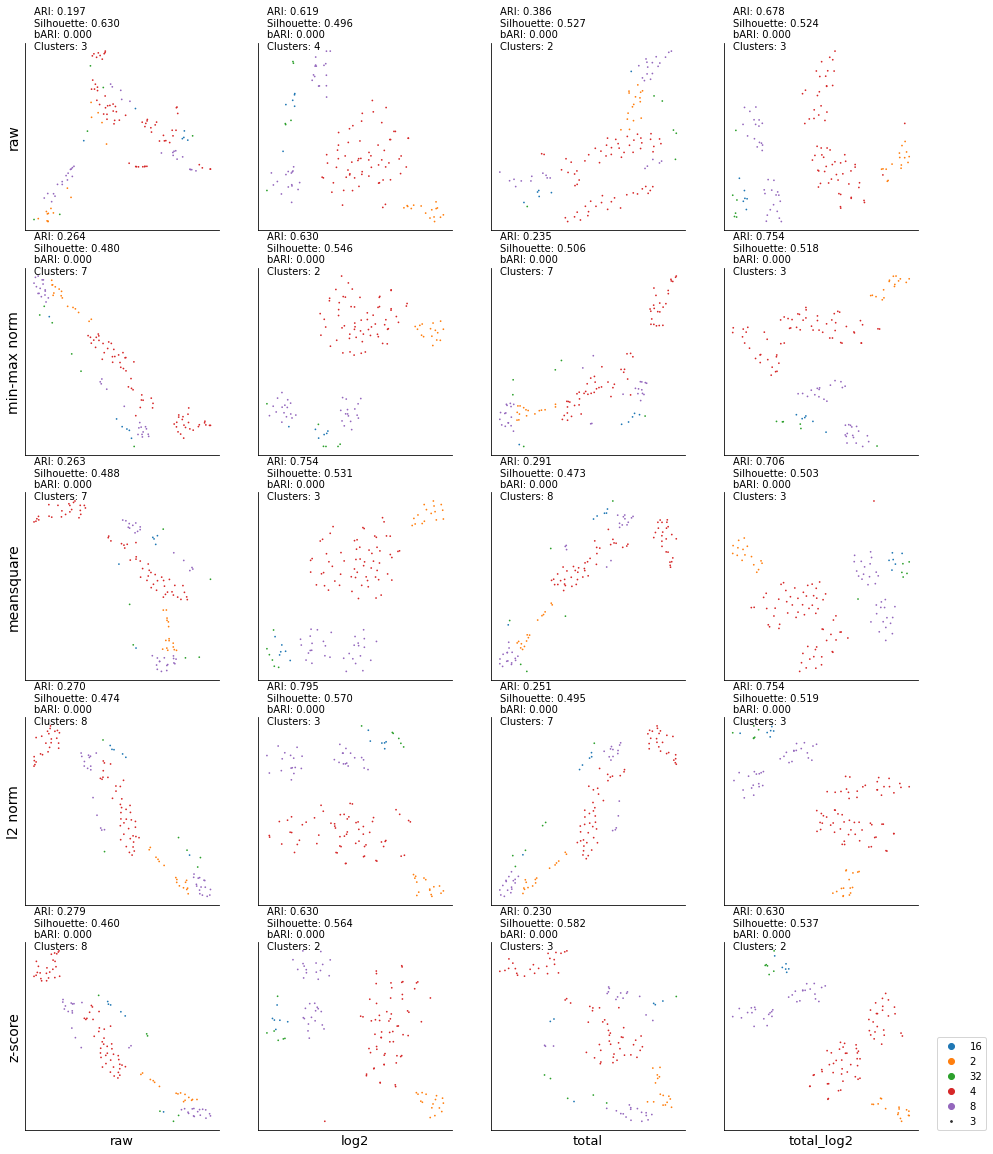

In [3]:
latent_space = TSNE(n_components=2)
#latent_space = UMAP(n_components=2, init='spectral', random_state=0)
clustering_method = 'kmean'

############################################
plt.figure(figsize=(16,20))
ax00 = plt.subplot2grid((5,4), (0,0)) 
ax10 = plt.subplot2grid((5,4), (0,1))  
ax20 = plt.subplot2grid((5,4), (0,2))  
ax30 = plt.subplot2grid((5,4), (0,3))  

ax01 = plt.subplot2grid((5,4), (1,0)) 
ax11 = plt.subplot2grid((5,4), (1,1))  
ax21 = plt.subplot2grid((5,4), (1,2))  
ax31 = plt.subplot2grid((5,4), (1,3))  

ax02 = plt.subplot2grid((5,4), (2,0)) 
ax12 = plt.subplot2grid((5,4), (2,1))  
ax22 = plt.subplot2grid((5,4), (2,2))  
ax32 = plt.subplot2grid((5,4), (2,3))  

ax03 = plt.subplot2grid((5,4), (3,0)) 
ax13 = plt.subplot2grid((5,4), (3,1))  
ax23 = plt.subplot2grid((5,4), (3,2))  
ax33 = plt.subplot2grid((5,4), (3,3))

ax04 = plt.subplot2grid((5,4), (4,0)) 
ax14 = plt.subplot2grid((5,4), (4,1))  
ax24 = plt.subplot2grid((5,4), (4,2))  
ax34 = plt.subplot2grid((5,4), (4,3))

l = []
############################################
l.append(run_plot(df_cp(total_data), \
         ax00, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_log(df_cp(total_data)), \
         ax10, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_total20000(df_cp(total_data)), \
         ax20, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_log(df_total20000(df_cp(total_data))), \
         ax30, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_minmax(df_cp(total_data)), \
         ax01, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_minmax(df_log(df_cp(total_data))), \
         ax11, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_minmax(df_total20000(df_cp(total_data))), \
         ax21, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_minmax(df_log(df_total20000(df_cp(total_data)))), \
         ax31, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_meansquare(df_cp(total_data)), \
         ax02, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_meansquare(df_log(df_cp(total_data))), \
         ax12, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_meansquare(df_total20000(df_cp(total_data))), \
         ax22, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_meansquare(df_log(df_total20000(df_cp(total_data)))), \
         ax32, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_l2norm(df_cp(total_data)), \
         ax03, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_l2norm(df_log(df_cp(total_data))), \
         ax13, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_l2norm(df_total20000(df_cp(total_data))), \
         ax23, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_l2norm(df_log(df_total20000(df_cp(total_data)))), \
         ax33, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_zscore(df_cp(total_data)), \
         ax04, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_zscore(df_log(df_cp(total_data))), \
         ax14, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_zscore(df_total20000(df_cp(total_data))), \
         ax24, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_zscore(df_log(df_total20000(df_cp(total_data)))), \
         ax34, labels, latent_space, clustering_method)
        )
############################################
ax00.set_ylabel('raw' , fontsize=14)
ax01.set_ylabel('min-max norm' , fontsize=14)
ax02.set_ylabel('meansquare' , fontsize=14)
ax03.set_ylabel('l2 norm' , fontsize=14)
ax04.set_ylabel('z-score' , fontsize=14)

ax04.set_xlabel('raw', fontsize=13)
ax14.set_xlabel('log2', fontsize=13)
ax24.set_xlabel('total', fontsize=13)
ax34.set_xlabel('total_log2', fontsize=13)
ax34.legend(bbox_to_anchor=(1.1,0), loc='lower left',borderaxespad=0)

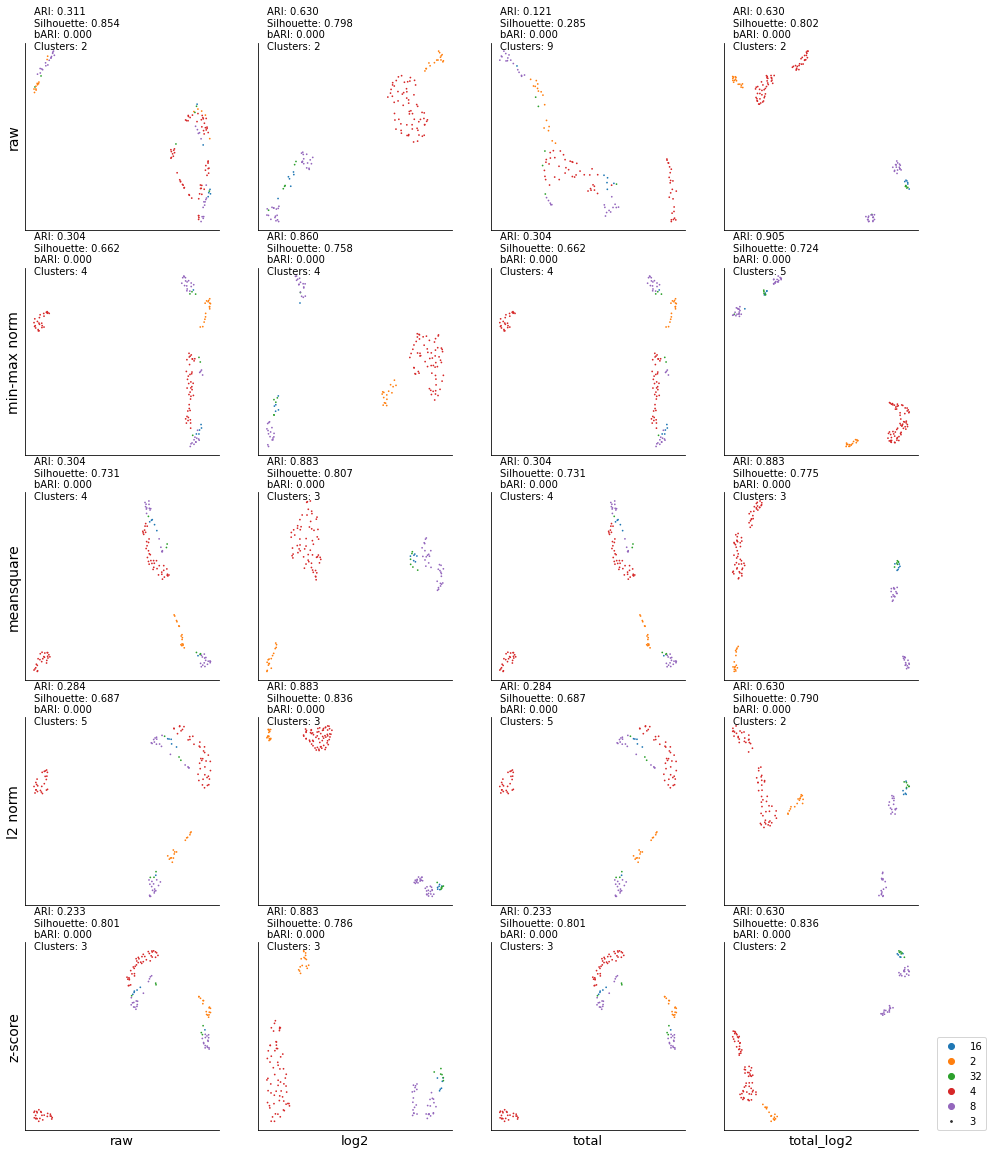

In [4]:
#latent_space = TSNE(n_components=2)
latent_space = UMAP(n_components=2, init='spectral', random_state=0)
clustering_method = 'dbscan'

############################################
plt.figure(figsize=(16,20))
ax00 = plt.subplot2grid((5,4), (0,0)) 
ax10 = plt.subplot2grid((5,4), (0,1))  
ax20 = plt.subplot2grid((5,4), (0,2))  
ax30 = plt.subplot2grid((5,4), (0,3))  

ax01 = plt.subplot2grid((5,4), (1,0)) 
ax11 = plt.subplot2grid((5,4), (1,1))  
ax21 = plt.subplot2grid((5,4), (1,2))  
ax31 = plt.subplot2grid((5,4), (1,3))  

ax02 = plt.subplot2grid((5,4), (2,0)) 
ax12 = plt.subplot2grid((5,4), (2,1))  
ax22 = plt.subplot2grid((5,4), (2,2))  
ax32 = plt.subplot2grid((5,4), (2,3))  

ax03 = plt.subplot2grid((5,4), (3,0)) 
ax13 = plt.subplot2grid((5,4), (3,1))  
ax23 = plt.subplot2grid((5,4), (3,2))  
ax33 = plt.subplot2grid((5,4), (3,3))

ax04 = plt.subplot2grid((5,4), (4,0)) 
ax14 = plt.subplot2grid((5,4), (4,1))  
ax24 = plt.subplot2grid((5,4), (4,2))  
ax34 = plt.subplot2grid((5,4), (4,3))

l = []
############################################
l.append(run_plot(df_cp(total_data), \
         ax00, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_log(df_cp(total_data)), \
         ax10, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_total20000(df_cp(total_data)), \
         ax20, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_log(df_total20000(df_cp(total_data))), \
         ax30, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_minmax(df_cp(total_data)), \
         ax01, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_minmax(df_log(df_cp(total_data))), \
         ax11, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_minmax(df_total20000(df_cp(total_data))), \
         ax21, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_minmax(df_log(df_total20000(df_cp(total_data)))), \
         ax31, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_meansquare(df_cp(total_data)), \
         ax02, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_meansquare(df_log(df_cp(total_data))), \
         ax12, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_meansquare(df_total20000(df_cp(total_data))), \
         ax22, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_meansquare(df_log(df_total20000(df_cp(total_data)))), \
         ax32, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_l2norm(df_cp(total_data)), \
         ax03, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_l2norm(df_log(df_cp(total_data))), \
         ax13, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_l2norm(df_total20000(df_cp(total_data))), \
         ax23, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_l2norm(df_log(df_total20000(df_cp(total_data)))), \
         ax33, labels, latent_space, clustering_method)
        )
############################################
l.append(run_plot(df_zscore(df_cp(total_data)), \
         ax04, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_zscore(df_log(df_cp(total_data))), \
         ax14, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_zscore(df_total20000(df_cp(total_data))), \
         ax24, labels, latent_space, clustering_method)
        )
l.append(run_plot(df_zscore(df_log(df_total20000(df_cp(total_data)))), \
         ax34, labels, latent_space, clustering_method)
        )
############################################
ax00.set_ylabel('raw' , fontsize=14)
ax01.set_ylabel('min-max norm' , fontsize=14)
ax02.set_ylabel('meansquare' , fontsize=14)
ax03.set_ylabel('l2 norm' , fontsize=14)
ax04.set_ylabel('z-score' , fontsize=14)

ax04.set_xlabel('raw', fontsize=13)
ax14.set_xlabel('log2', fontsize=13)
ax24.set_xlabel('total', fontsize=13)
ax34.set_xlabel('total_log2', fontsize=13)
ax34.legend(bbox_to_anchor=(1.1,0), loc='lower left',borderaxespad=0)